In [ ]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# New Section

In [ ]:
path = "/content/data.csv"
df = pd.read_csv(path, on_bad_lines='skip')

In [ ]:
print("Sample data:")
print(df.head(5))

Sample data:
      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1


In [ ]:
# Clean data
df = df.dropna(subset=['password', 'strength'])  # remove missing
df['password'] = df['password'].astype(str)      # convert to string
df['strength'] = df['strength'].astype(int)      # ensure it's integer

<ipython-input-4-064d55e6abb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['password'] = df['password'].astype(str)      # convert to string
<ipython-input-4-064d55e6abb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strength'] = df['strength'].astype(int)      # ensure it's integer


In [ ]:
def extract_features(password):
    return [
        len(password),  # total length
        sum(c.isdigit() for c in password),  # number of digits
        sum(c.isupper() for c in password),  # number of uppercase letters
        sum(c.islower() for c in password),  # number of lowercase letters
        sum(c in string.punctuation for c in password)  # number of special chars
    ]

In [ ]:
X = df['password'].apply(extract_features).tolist()
y = df['strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Model Evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [ ]:
def predict_password_strength(password):
    features = extract_features(password)
    pred = model.predict([features])[0]
    strength_label = {0: "Weak", 1: "Medium", 2: "Strong"}
    return strength_label.get(pred, "Unknown")

In [ ]:
test_pw = "SUNIB!jayajayajaya"
print(f"\nPrediction for '{test_pw}':", predict_password_strength(test_pw))


Prediction for 'SUNIB!jayajayajaya': Strong


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

<ipython-input-14-4f89c98a1ddf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='strength', palette='viridis')


Text(0, 0.5, 'Count')

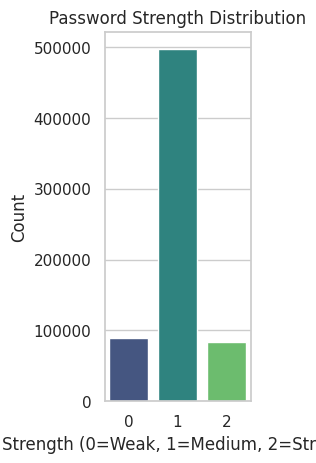

In [ ]:
# --- Plot 1: Class Distribution ---
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='strength', palette='viridis')
plt.title("Password Strength Distribution")
plt.xlabel("Strength (0=Weak, 1=Medium, 2=Strong)")
plt.ylabel("Count")

<ipython-input-15-8c4f977daba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='rocket')


Text(0.5, 0, 'Importance Score')

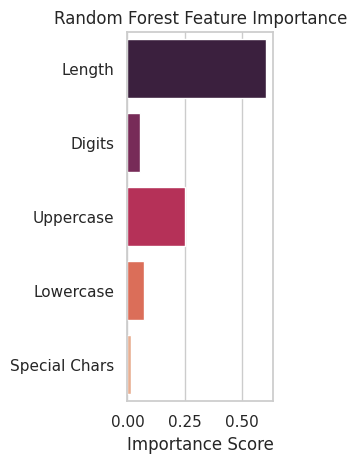

In [ ]:
# --- Plot 2: Feature Importance ---
plt.subplot(1, 3, 2)
feature_names = ['Length', 'Digits', 'Uppercase', 'Lowercase', 'Special Chars']
importances = model.feature_importances_
sns.barplot(x=importances, y=feature_names, palette='rocket')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")

Text(396.36764705882354, 0.5, 'Actual')

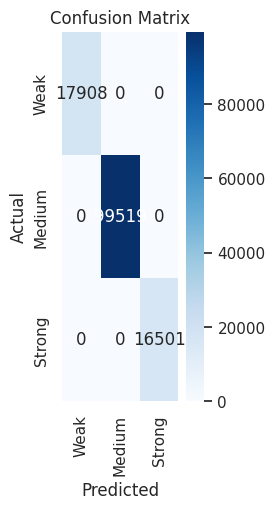

In [ ]:
# --- Plot 3: Confusion Matrix ---
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Weak', 'Medium', 'Strong'],
            yticklabels=['Weak', 'Medium', 'Strong'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
# Adjust layout and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>